## КМ2

1) На занятиях мы рассмотрели сжатие данных с помощью сингулярного
разложения и зануления сингулярных чисел. Проанализируйте, как
меняются размерности матриц U, diag(sigma), VT в зависимости от
числа удерживаемых сингулярных чисел, как меняется число
обусловленности (отношение максимального к минимальному
сингулярному числу).

2) Определите собственные числа матрицы
𝐴 =\begin{pmatrix}
1000 & 0 & 1 \\
−1 & 1 & 1 \\
1 & −1 & 0
\end{pmatrix} и 𝐴@$𝐴^T$. Для тех же матриц вычислите сингулярные числа, сравните собственные
и сингулярные числа. 

In [42]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt


def gen_uniform_matrix(a, b, m, n):
    matrix = np.random.uniform(a, b, (m, n))
    return matrix


def svd_compress(m):
    U, s, VT = la.svd(m)
    z_s = list(range(len(s)))
    shape_U, shape_s, shape_VT = [], [], []
    cond_l = []
    for i in z_s:
        ss = s if i == 0 else np.concatenate((s[:-i], np.zeros(i)))
        shape_U.append((U.shape[0]-i, U.shape[1]))
        shape_s.append((np.diag(ss).shape[0]-i, np.diag(ss).shape[1]-i))
        shape_VT.append((VT.shape[0], U.shape[1]-i))
        if i == 0:
            cond_l.append(np.max(s)/np.min(s))
        else:
            cond_l.append(np.max(s[:-i])/np.min(s[:-i]))
    return z_s, shape_U, shape_s, shape_VT, cond_l


matrix = gen_uniform_matrix(0, 10, 10, 5)
data = svd_compress(matrix)
data

([0, 1, 2, 3, 4],
 [(10, 10), (9, 10), (8, 10), (7, 10), (6, 10)],
 [(5, 5), (4, 4), (3, 3), (2, 2), (1, 1)],
 [(5, 10), (5, 9), (5, 8), (5, 7), (5, 6)],
 [12.480355755115728,
  5.158283788657161,
  4.582289958976533,
  2.661073311061315,
  1.0])

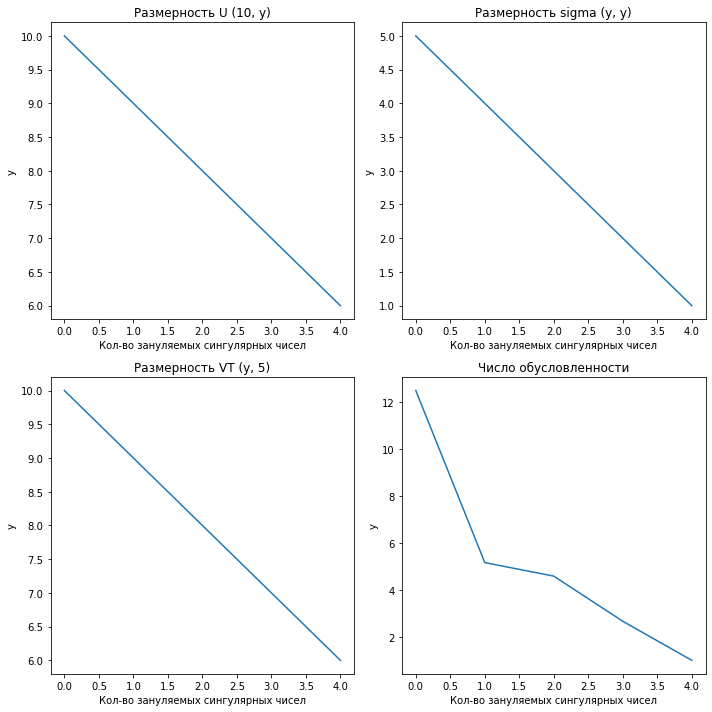

In [44]:
def view_change(data):
    x = data[0]
    y_U = [i[0] for i in data[1]]
    y_s = [i[0] for i in data[2]]
    y_VT = [i[1] for i in data[3]]
    y_cond = data[4]
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    ax1.set_title(f'Размерность U ({data[1][1][1]}, y)')
    ax2.set_title(f'Размерность sigma (y, y)')
    ax3.set_title(f'Размерность VT (y, {data[3][0][0]})')
    ax4.set_title(f'Число обусловленности')
    for ax in (ax1, ax2, ax3, ax4):
        ax.set_xlabel('Кол-во зануляемых сингулярных чисел')
        ax.set_ylabel('y')
    ax1.plot(x, y_U)
    ax2.plot(x, y_s)
    ax3.plot(x, y_VT)
    ax4.plot(x, y_cond)
    plt.tight_layout()
    plt.show()

view_change(data)

## Задание 2

In [41]:
A1 = np.array([[1000, 0, 1], [-1, 1, 1], [1, -1, 0]])
A2 = A1 @ A1.transpose()
print('Собственные числа')
print(la.eigh(A1)[0]) #Собственые числа первой матрицы
print(la.eigh(A2)[0]) #Собственые числа второй матрицы
print('Сингулярные числа')
print(la.svd(A1)[1]) #Сингулярные числа первой матрицы
print(la.svd(A2)[1]) #Сингулярные числа второй матрицы

Собственные числа
[-6.18139586e-01  1.61613658e+00  1.00000200e+03]
[3.81624071e-01 2.62037193e+00 1.00000300e+06]
Сингулярные числа
[1.00000150e+03 1.61875629e+00 6.17757291e-01]
[1.00000300e+06 2.62037193e+00 3.81624071e-01]
